<a href="https://colab.research.google.com/github/Arash-Razi/ML_Dr_Aliyari_Course_2025/blob/main/MiniP2/ML2025_MiniP2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **Importing Necessary Libraries**


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


## **Importing Dataset**

In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data[:10000]
y = mnist.target[:10000]


### **Scaling Dataset**

In [ ]:
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### **Implementing KNN model**


Accuracy for 1 neighbors: 0.9463333333333334
Accuracy for 3 neighbors: 0.9466666666666667
Accuracy for 5 neighbors: 0.942
Accuracy for 7 neighbors: 0.9383333333333334
Accuracy for 9 neighbors: 0.936
Accuracy for 11 neighbors: 0.9366666666666666
Accuracy for 13 neighbors: 0.9336666666666666
Accuracy for 15 neighbors: 0.9303333333333333
Accuracy for 17 neighbors: 0.9296666666666666
Accuracy for 19 neighbors: 0.9263333333333333
Accuracy for 21 neighbors: 0.9253333333333333
Accuracy for 23 neighbors: 0.9206666666666666


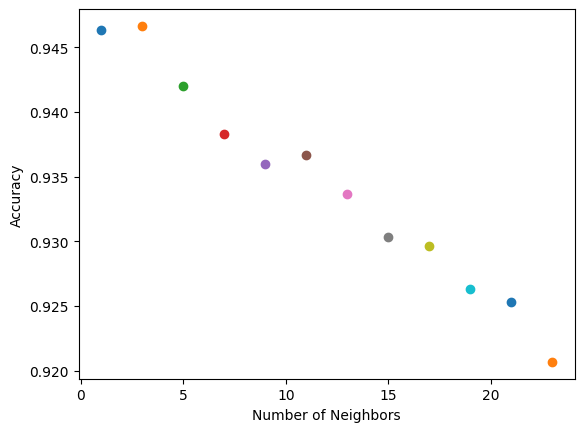

In [ ]:
N = [i for i in range(1,25,2)]

for i in N:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test,y_test)
    print(f"Accuracy for {i} neighbors: {score}")

    plt.ylabel("Accuracy")
    plt.xlabel("Number of Neighbors")
    plt.scatter(i,score)



### **Enhance Structure Using PCA**

Accuracy for 20 neighbors: 0.9483333333333334
Accuracy for 30 neighbors: 0.9563333333333334
Accuracy for 40 neighbors: 0.9563333333333334
Accuracy for 50 neighbors: 0.9546666666666667
Accuracy for 60 neighbors: 0.9526666666666667
Accuracy for 70 neighbors: 0.9506666666666667
Accuracy for 80 neighbors: 0.9503333333333334
Accuracy for 90 neighbors: 0.9503333333333334


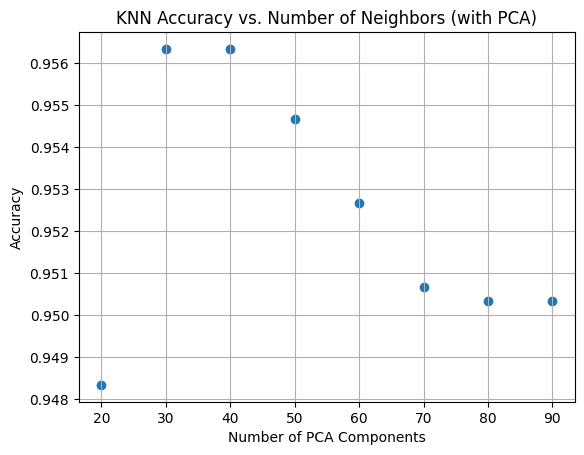

In [ ]:
N1 = [i for i in range(20,100,10)]
neighbor_values = []
accuracy_values = []
for i in N1:

  pca = PCA(n_components=i)
  X_pca = pca.fit_transform(X_scaled)

  X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


  clf = KNeighborsClassifier(n_neighbors=5)
  clf.fit(X_train, y_train)
  score = clf.score(X_test,y_test)
  neighbor_values.append(i)
  accuracy_values.append(score)

  print(f"Accuracy for {i} neighbors: {score}")

plt.scatter(neighbor_values, accuracy_values)
plt.ylabel("Accuracy")
plt.xlabel("Number of PCA Components")
plt.title("KNN Accuracy vs. Number of Neighbors (with PCA)") # Updated title
plt.grid(True)
plt.show()
